In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/justmarkham/scikit-learn-videos/master/data/Advertising.csv',index_col=0)

data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [3]:
data.tail()

,TV,Radio,Newspaper,Sales
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5
200,232.1,8.6,8.7,13.4


In [4]:
data.shape

(200, 4)

In [5]:
import seaborn as sns

C:\Users\Wesley\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


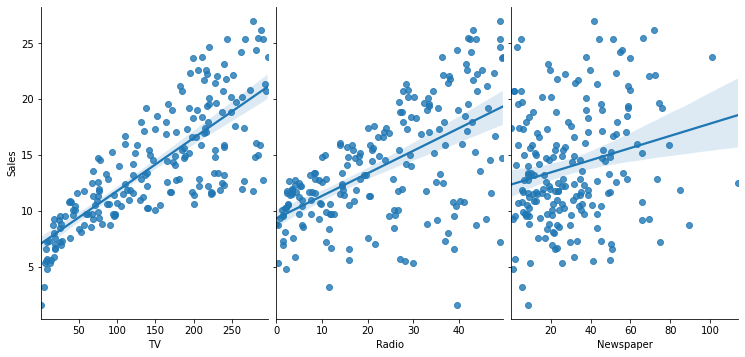

In [6]:
sns.pairplot(data, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', size=5, aspect=0.7, kind='reg')

In [7]:
feature_cols = ['TV', 'Radio', 'Newspaper']
X = data[feature_cols]
X.head()

,TV,Radio,Newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [8]:
y = data['Sales']
y.head()

1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: Sales, dtype: float64

In [9]:
print(X.shape)
print(y.shape)

(200, 3)
(200,)


In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [11]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(150, 3)
(50, 3)
(150,)
(50,)


In [12]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

In [13]:
print(linreg.intercept_)
print(linreg.coef_)

2.8769666223179318
[0.04656457 0.17915812 0.00345046]


In [14]:
list(zip(feature_cols, linreg.coef_))

[('TV', 0.046564567874150295),
 ('Radio', 0.1791581224508883),
 ('Newspaper', 0.0034504647111804065)]

In [15]:
linreg.predict([[100, 1, 1],[1, 100, 1],[1, 1, 100]])

array([ 7.716032  , 20.8427939 ,  3.44773578])

In [16]:
y_pred = linreg.predict(X_test)

In [17]:
from sklearn import metrics
import numpy as np
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.404651423032896


In [18]:
feature_cols = ['TV', 'Radio']

X = data[feature_cols]
y = data['Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

linreg.fit(X_train, y_train)

y_pred = linreg.predict(X_test)

print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.3879034699382888


In [19]:
results = []
linreg.fit(X, y)
for b1 in range(1,1000):
    for b2 in range(1,1000):
        results.append(linreg.predict([[b1, b2]]))

In [20]:
results

[array([3.15484895]),
 array([3.34284318]),
 array([3.53083741]),
 array([3.71883163]),
 array([3.90682586]),
 array([4.09482009]),
 array([4.28281431]),
 array([4.47080854]),
 array([4.65880277]),
 array([4.84679699]),
 array([5.03479122]),
 array([5.22278545]),
 array([5.41077967]),
 array([5.5987739]),
 array([5.78676813]),
 array([5.97476235]),
 array([6.16275658]),
 array([6.35075081]),
 array([6.53874503]),
 array([6.72673926]),
 array([6.91473349]),
 array([7.10272771]),
 array([7.29072194]),
 array([7.47871617]),
 array([7.66671039]),
 array([7.85470462]),
 array([8.04269885]),
 array([8.23069307]),
 array([8.4186873]),
 array([8.60668153]),
 array([8.79467575]),
 array([8.98266998]),
 array([9.17066421]),
 array([9.35865843]),
 array([9.54665266]),
 array([9.73464689]),
 array([9.92264111]),
 array([10.11063534]),
 array([10.29862957]),
 array([10.48662379]),
 array([10.67461802]),
 array([10.86261225]),
 array([11.05060647]),
 array([11.2386007]),
 array([11.42659493]),
 arra